# Tutorial de Machine Learning #5 - Adicionando Novas Variáveis ao Modelo

## Titanic: Machine Learning from Disaster

**Predict survival on the Titanic and get familiar with ML basics: [Start here!](https://www.kaggle.com/c/titanic/data)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/train.csv')

In [3]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [4]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis]
y = train['Survived']

In [21]:
X.isna().sum()

Sex_binario      0
Age            177
Pclass           0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [5]:
X = X.fillna(-1)

In [23]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [24]:
X.shape

(891, 6)

### Divisão treino e teste

In [ ]:
np.random.seed(0)
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.5)


## Validação cruzada

In [6]:
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [8]:
?RepeatedKFold

Init signature: RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
Docstring:     
Repeated K-Fold cross validator.

Repeats K-Fold n times with different randomization in each repetition.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
n_splits : int, default=5
    Number of folds. Must be at least 2.

n_repeats : int, default=10
    Number of times cross-validator needs to be repeated.

random_state : int, RandomState instance or None, optional, default=None
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

Examples
--------
>>> import numpy as np
>>> from sklearn.model_selection import RepeatedKFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
>>> f

## Criar 10 repetições de 2 validações aleatórias

In [25]:
resultados = []

# Instância para 10 repetições de 2 validações aleatórias
rkf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in rkf.split(X):
    print('Treino: ', linhas_treino.shape[0])
    print('Valid: ', linhas_valid.shape[0])
#     print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, 
                                n_jobs=-1, 
                                random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('Accuracy: ', acc)
    print()


Treino:  445
Valid:  446
Accuracy:  0.7869955156950673

Treino:  446
Valid:  445
Accuracy:  0.7797752808988764

Treino:  445
Valid:  446
Accuracy:  0.827354260089686

Treino:  446
Valid:  445
Accuracy:  0.8179775280898877

Treino:  445
Valid:  446
Accuracy:  0.7847533632286996

Treino:  446
Valid:  445
Accuracy:  0.7842696629213484

Treino:  445
Valid:  446
Accuracy:  0.8161434977578476

Treino:  446
Valid:  445
Accuracy:  0.7842696629213484

Treino:  445
Valid:  446
Accuracy:  0.8004484304932735

Treino:  446
Valid:  445
Accuracy:  0.8

Treino:  445
Valid:  446
Accuracy:  0.8183856502242153

Treino:  446
Valid:  445
Accuracy:  0.802247191011236

Treino:  445
Valid:  446
Accuracy:  0.8116591928251121

Treino:  446
Valid:  445
Accuracy:  0.8067415730337079

Treino:  445
Valid:  446
Accuracy:  0.820627802690583

Treino:  446
Valid:  445
Accuracy:  0.7887640449438202

Treino:  445
Valid:  446
Accuracy:  0.8385650224215246

Treino:  446
Valid:  445
Accuracy:  0.8044943820224719

Treino:  4

In [26]:
len(resultados)

20

In [27]:
np.mean(resultados)

0.8041457147175896

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

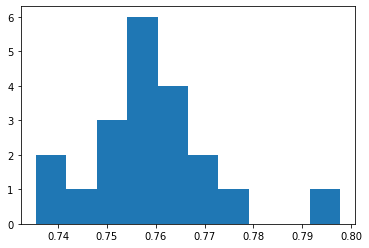

In [16]:
pylab.hist(resultados)

modelo anterior = 0.759601451100922

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

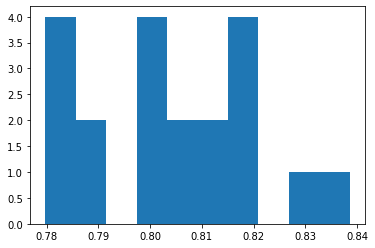

In [28]:
pylab.hist(resultados)

### Retreinar o modelo

In [7]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [9]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [12]:
modelo = RandomForestClassifier(n_estimators=100, 
                                n_jobs=-1, 
                                random_state=0)

modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [13]:
p

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Criar submission

In [14]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(891,)

In [15]:
sub.to_csv('modelo/segundo_modelo.csv', header=True)

In [16]:
# Ler primeira 10 linhas do arquivo. '!' para comando linux 
!head -n10 modelo/segundo_modelo.csv

PassengerId,Survived
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,1
